In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import numpy as np



# -----------------------------
# 1) 데이터 준비
# -----------------------------


In [38]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------


import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']



In [39]:
# ===============================
# 2) 특정 클래스만 선택
# ===============================

selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c) for c in selected_classes]

# train/test 데이터 필터링
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask  = np.isin(y_test,  selected_idx).flatten()

X_train, y_train = X_train[train_mask], y_train[train_mask]
X_test,  y_test  = X_test[test_mask],  y_test[test_mask]

In [40]:
print("선택된 학습 데이터:", X_train.shape, y_train.shape)
print("선택된 테스트 데이터:", X_test.shape, y_test.shape)

선택된 학습 데이터: (15000, 32, 32, 3) (15000, 1)
선택된 테스트 데이터: (3000, 32, 32, 3) (3000, 1)


In [41]:
# ===============================
# 3) 라벨 매핑 (예: cat=0, dog=1, horse=2)
# ===============================
label_map = {v:i for i,v in enumerate(selected_idx)}
y_train = np.array([label_map[int(v)] for v in y_train])
y_test  = np.array([label_map[int(v)] for v in y_test])

/var/folders/kr/40f2zd957vq77nm9txt6dlg40000gn/T/ipykernel_82110/3627728919.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(v)] for v in y_train])
/var/folders/kr/40f2zd957vq77nm9txt6dlg40000gn/T/ipykernel_82110/3627728919.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test  = np.array([label_map[int(v)] for v in y_test])


In [42]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [44]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),              
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),               
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)



In [45]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4638 - loss: 1.0503 - val_accuracy: 0.5513 - val_loss: 0.8907
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5757 - loss: 0.8698 - val_accuracy: 0.6450 - val_loss: 0.7964
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6181 - loss: 0.8122 - val_accuracy: 0.6667 - val_loss: 0.7566
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6457 - loss: 0.7627 - val_accuracy: 0.6870 - val_loss: 0.7117
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6672 - loss: 0.7237 - val_accuracy: 0.6797 - val_loss: 0.6962
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6772 - loss: 0.6973 - val_accuracy: 0.7077 - val_loss: 0.6778
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6953 - loss: 0.6754 - val_accuracy: 0.7103 - val_loss: 0.6616
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7182 - loss: 0.6426 - val_accuracy: 0.

In [46]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

y_pred = model.predict(X_test)

y_pred_class = np.argmax(y_pred, axis=1)     # (N,)
y_test_class = y_test  # (N,)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
# 학습 곡선

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

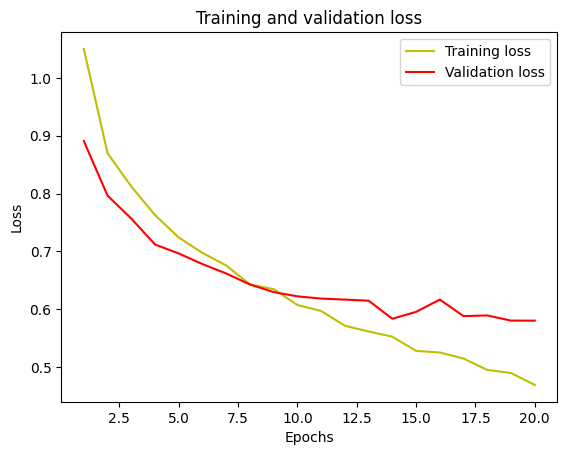

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

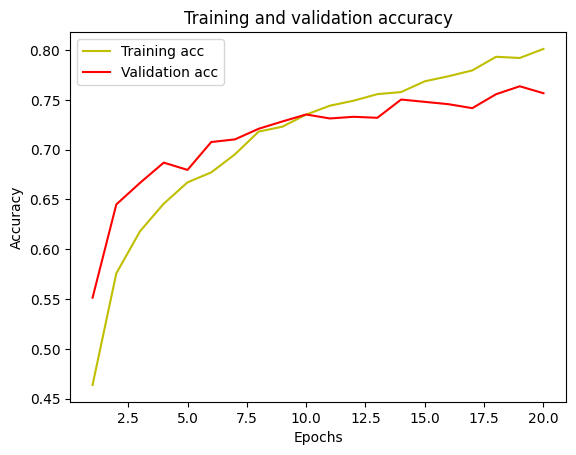

In [49]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [50]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.70      0.68      0.69      1000
           2       0.88      0.83      0.86      1000

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000

[[751 194  55]
 [257 682  61]
 [ 73  93 834]]
